Car Price Prediction

Importing necessary modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('/kaggle/input/car-price/car.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# copying raw data without encoding
car_data=data.copy()
print('Data copied')

Data copied


Describing the Data and its Characterstics

In [4]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [7]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
object_columns = ['Car_Name', 'Fuel_Type', 'Transmission','Seller_Type']  # Example object columns

for column in object_columns:
    data[column] = lab_enc.fit_transform(data[column])

print("\nData after Label Encoding:")
print(data.dtypes)


Data after Label Encoding:
Car_Name           int64
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int64
Seller_Type        int64
Transmission       int64
Owner              int64
dtype: object


Visualizing the Data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


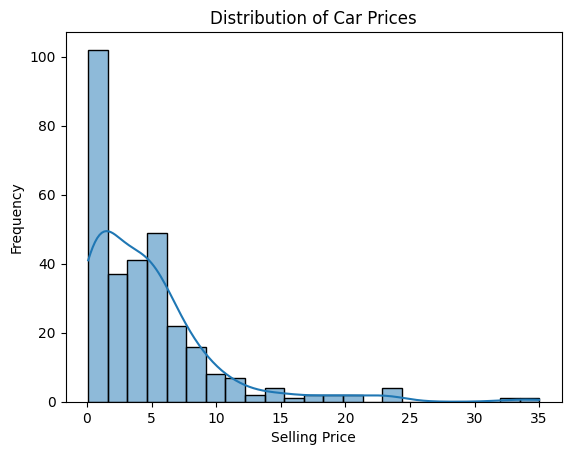

In [9]:
# Distribution of car prices
sns.histplot(data['Selling_Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

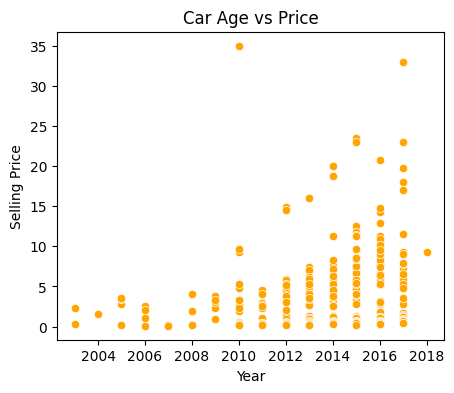

In [10]:
# Scatter plot of car age vs price
plt.figure(figsize=(5,4))
sns.scatterplot(x='Year', y='Selling_Price', data=data,color='orange')
plt.title('Car Age vs Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

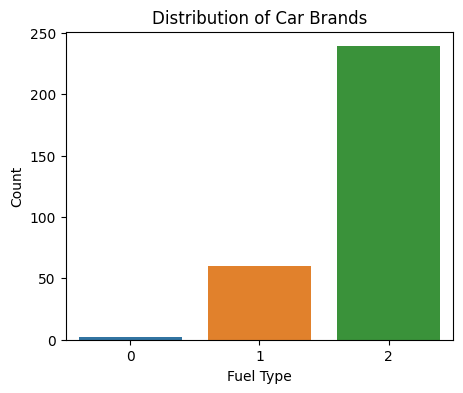

{0: 'CNG', 1: 'Diesel', 2: 'Petrol'} 

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Total Cars: 301


In [11]:
# Bar plot for Fuel types count
plt.figure(figsize=(5,4))
sns.countplot(x='Fuel_Type', data=data)
plt.title('Distribution of Car Brands')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()
fval = {0:'CNG',1:'Diesel',2:'Petrol'}
print(fval,'\n')
print(car_data['Fuel_Type'].value_counts())
print('Total Cars:',len(car_data['Fuel_Type']))

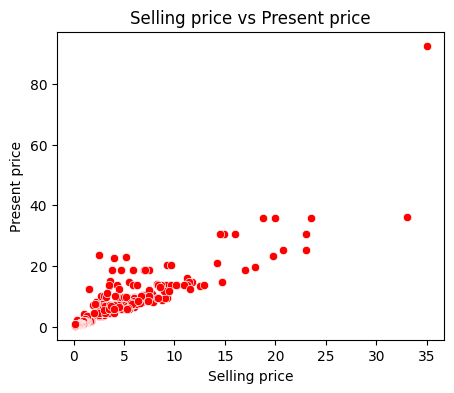

In [12]:
# Scatter plot of mileage vs price
plt.figure(figsize=(5,4))
sns.scatterplot( x='Selling_Price',y='Present_Price', data=data,color='r')
plt.title('Selling price vs Present price')
plt.xlabel('Selling price')
plt.ylabel('Present price')
plt.show()

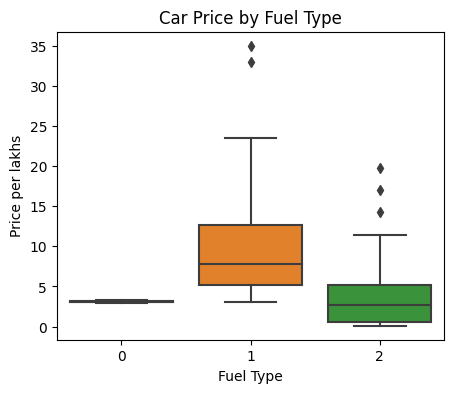

{0: 'CNG', 1: 'Diesel', 2: 'Petrol'} 



In [13]:
# Box plot of car price by fuel type
plt.figure(figsize=(5,4))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Car Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price per lakhs')
plt.show()
print(fval,'\n')

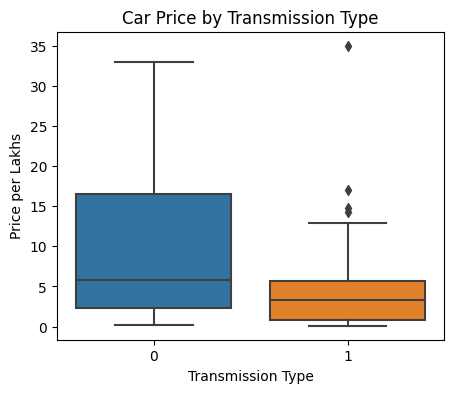

{0: 'Manual', 1: 'Automatic'}


In [14]:
# Box plot of car price by transmission type
plt.figure(figsize=(5,4))
sns.boxplot(x='Transmission', y='Selling_Price', data=data)
plt.title('Car Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price per Lakhs')
plt.show()
trval={0:'Manual',1:'Automatic'}
print(trval)

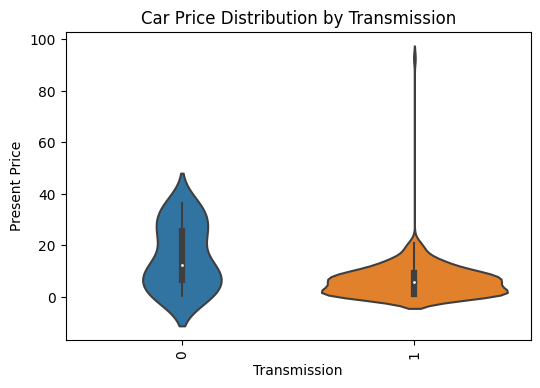

In [15]:
# Violin plot of car price by Transmission
plt.figure(figsize=(6,4))
sns.violinplot(x='Transmission', y='Present_Price', data=data)
plt.title('Car Price Distribution by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Present Price')
plt.xticks(rotation=90)
plt.show()

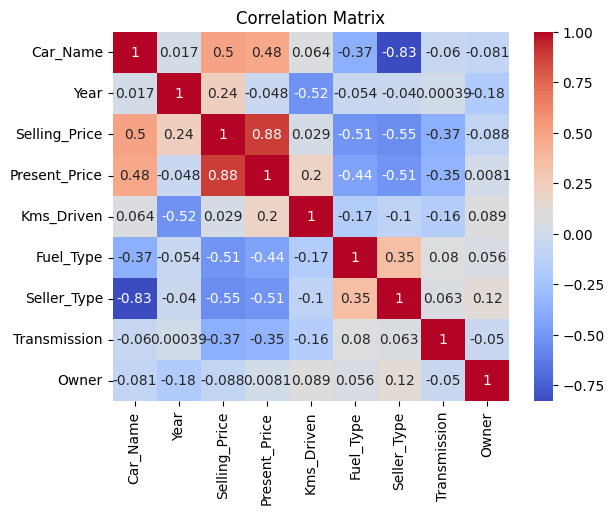

In [16]:
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Data Preprocessing and Model Building

In [17]:
# Data preparing for training and testing

from sklearn.model_selection import train_test_split

x = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Predictions
y_pred_lr = lr.predict(x_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3.534719069697364
R-squared: 0.8465539666864582


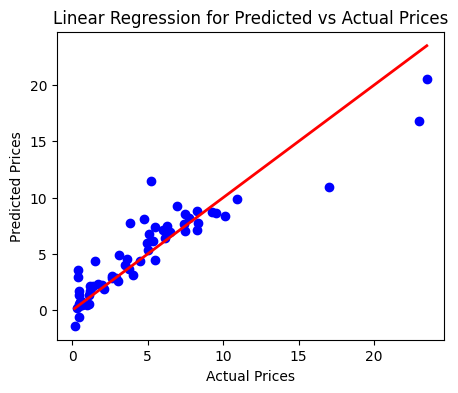

In [19]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red',linewidth=2)
plt.title('Linear Regression for Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [20]:
# k-Nearest Neighbors Regression model
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f'Mean Squared Error (k-NN): {mse_knn}')
print(f'R-squared (k-NN): {r2_knn}')

Mean Squared Error (k-NN): 23.49442327868853
R-squared (k-NN): -0.019918693966464396


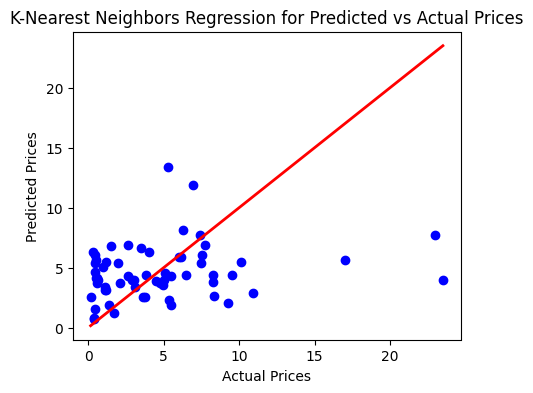

In [21]:
#plotting K-Nearest Neighbour regressor
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred_knn, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red',linewidth=2)
plt.title('K-Nearest Neighbors Regression for Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [22]:
# Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Mean Squared Error (Decision Tree): {mse_dt}')
print(f'R-squared (Decision Tree): {r2_dt}')

Mean Squared Error (Decision Tree): 1.8496918032786889
R-squared (Decision Tree): 0.9197028492309609


Text(0, 0.5, 'Predicted Prices')

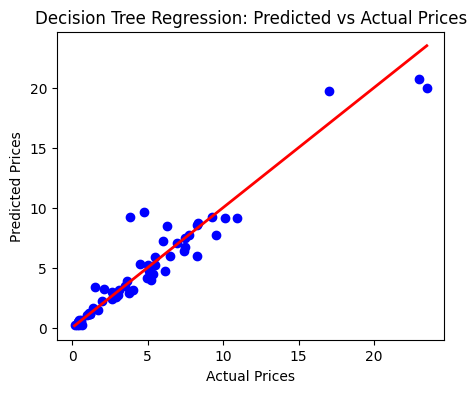

In [23]:
#plotting Decision Tree regressor
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred_dt, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red',linewidth=2)
plt.title('Decision Tree Regression: Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

In [24]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')

Mean Squared Error (Random Forest): 0.7710538111475419
R-squared (Random Forest): 0.9665277080132966


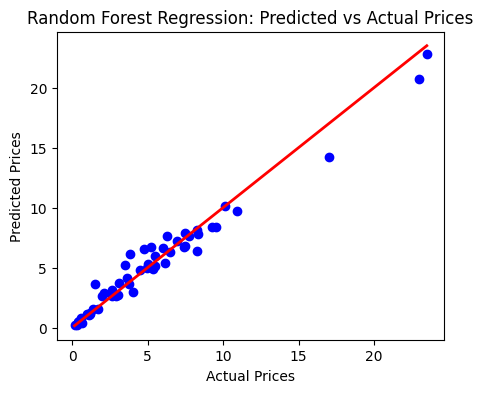

In [25]:
#plotting Random Forest regressor
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red',linewidth=2)
plt.title('Random Forest Regression: Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [26]:
# Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f'Mean Squared Error (Gradient Boosting): {mse_gbr}')
print(f'R-squared (Gradient Boosting): {r2_gbr}')

Mean Squared Error (Gradient Boosting): 0.6734987604043441
R-squared (Gradient Boosting): 0.9707626798090966


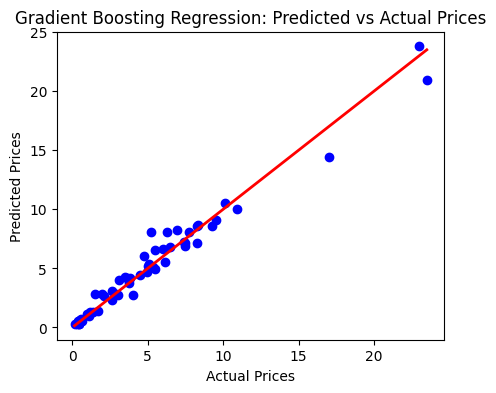

In [27]:
#plotting Gradient Boosting regressor
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred_gbr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red',linewidth=2)
plt.title('Gradient Boosting Regression: Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [28]:
# Support Vector Machine Regressor model
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'Mean Squared Error (SVR): {mse_svr}')
print(f'R-squared (SVR): {r2_svr}')

Mean Squared Error (SVR): 25.229175474670534
R-squared (SVR): -0.09522619026437673


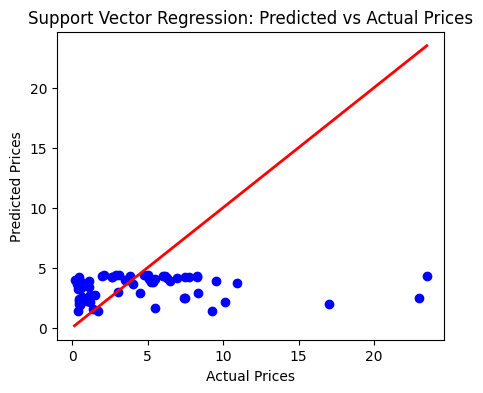

In [29]:
#plotting SVM regressor
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred_svr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red',linewidth=2)
plt.title('Support Vector Regression: Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [30]:
#K-Means Clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Data normalization
x_normal= scaler.fit_transform(x)
x_normal_df = pd.DataFrame(x_normal, columns=x.columns)
print(x_normal_df.head())

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(x_normal)
data['cluster'] = clusters

   Car_Name      Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0  1.074323  0.128897      -0.236215   -0.256224   0.500183    -0.737285   
1  1.191828 -0.217514       0.221505    0.155911  -1.852241    -0.737285   
2  0.212627  1.168129       0.257427   -0.773969   0.500183    -0.737285   
3  1.309332 -0.910335      -0.403079   -0.817758   0.500183    -0.737285   
4  1.152659  0.128897      -0.087890    0.141743  -1.852241    -0.737285   

   Transmission     Owner  
0       0.39148 -0.174501  
1       0.39148 -0.174501  
2       0.39148 -0.174501  
3       0.39148 -0.174501  
4       0.39148 -0.174501  


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


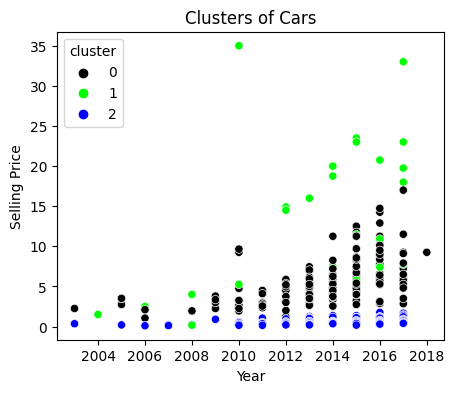

In [31]:
# Plotting the K-means Clustering
custom_palette = ['#000000', '#00FF00','#0000FF']
plt.figure(figsize=(5,4))
sns.scatterplot(x='Year', y='Selling_Price', hue='cluster', data=data, palette=custom_palette)
plt.title('Clusters of Cars')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [32]:
# Average car prices in different clusters
avg_price_per_cluster = data.groupby('cluster')['Selling_Price'].mean()
print(avg_price_per_cluster)

cluster
0     5.564850
1    12.388485
2     0.642574
Name: Selling_Price, dtype: float64


In [33]:
# Dimensionality Reduction using Principal Component Analysis (PCA)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_normal)

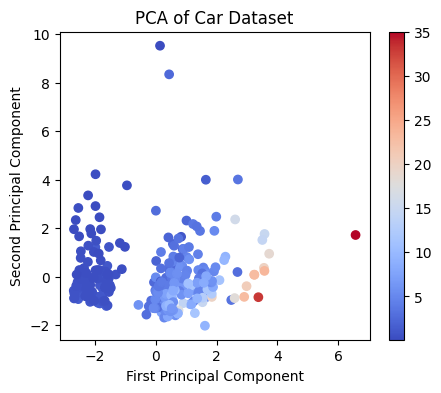

In [34]:
# Plot the PCA components
plt.figure(figsize=(5,4))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=data['Selling_Price'], cmap='coolwarm')
plt.colorbar()
plt.title('PCA of Car Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [35]:
# comparing evaluation metrices along with other models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2': []
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metrics['Model'].append(name)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['MAE'].append(mae)
    metrics['R2'].append(r2)

metrics_df = pd.DataFrame(metrics) # Convert the metrics dictionary to a DataFrame

In [36]:
print(metrics_df) # Display the evaluation metrics

               Model        MSE      RMSE       MAE        R2
0  Linear Regression   3.534719  1.880085  1.214234  0.846554
1      Decision Tree   1.500305  1.224869  0.682623  0.934870
2      Random Forest   0.752220  0.867306  0.574684  0.967345
3     Support Vector  25.229175  5.022865  3.154526 -0.095226
4  Gradient Boosting   0.715028  0.845594  0.538371  0.968960


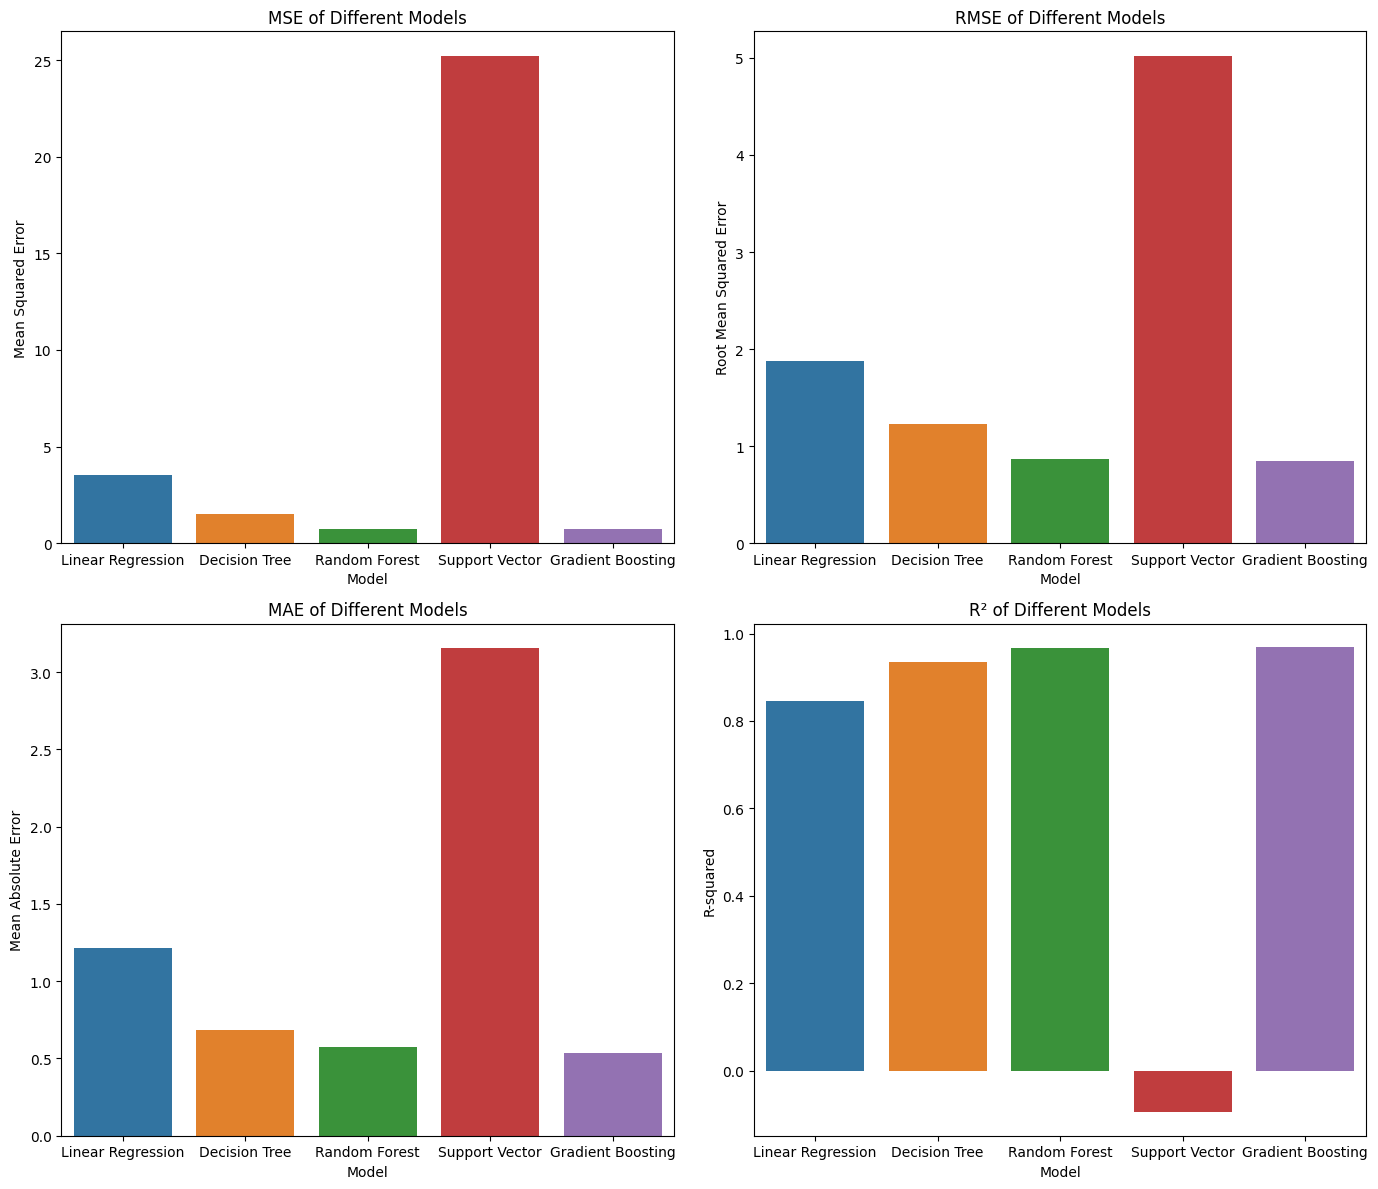

In [37]:
# Box plot of evaluation metrics
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

sns.barplot(x='Model', y='MSE', data=metrics_df, ax=axs[0, 0])
axs[0, 0].set_title('MSE of Different Models')
axs[0, 0].set_ylabel('Mean Squared Error')
axs[0, 0].set_xlabel('Model')

sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axs[0, 1])
axs[0, 1].set_title('RMSE of Different Models')
axs[0, 1].set_ylabel('Root Mean Squared Error')
axs[0, 1].set_xlabel('Model')

sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axs[1, 0])
axs[1, 0].set_title('MAE of Different Models')
axs[1, 0].set_ylabel('Mean Absolute Error')
axs[1, 0].set_xlabel('Model')

sns.barplot(x='Model', y='R2', data=metrics_df, ax=axs[1, 1])
axs[1, 1].set_title('R² of Different Models')
axs[1, 1].set_ylabel('R-squared')
axs[1, 1].set_xlabel('Model')

plt.tight_layout()
plt.show()